In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import toro2
from teyssier import riemann

In [2]:
N = 50
T = 0.15

configs = {
    "MUSCL-Hancock": dict(
        riemann_solver="hllct",
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        flux_recipe=2,
        SED=True,
    ),
    "ZS3-SSPRK2": dict(
        riemann_solver="hllct",
        p=3,
        ZS=True,
        flux_recipe=2,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "ZS3-SSPRK3": dict(
        riemann_solver="hllct",
        p=3,
        ZS=True,
        flux_recipe=2,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

In [3]:
# compute exact solution
Nana = 2048
xana = (np.arange(Nana) + 0.5) / Nana
wana = np.zeros([3, Nana])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.15
    d, v, p = riemann.exact_solution(s, [1, -2, 0.4], [1, 2, 0.4])
    wana[:, i] = [d, v, p]

In [4]:
sims = {}
for name, config in configs.items():
    sim = EulerSolver(ic=toro2, nx=N, bcx="free", **config)
    try:
        q_max = 1 if "SSPRK2" in name else 2
        sim.run(T, q_max=q_max, muscl_hancock=config.get("MUSCL", False))
    except Exception as e:
        print(f"Error occurred while running {name}: {e}")
    sims[name] = sim

Step #26 @ t=1.50e-01 | dt=4.46e-03 | min(rho)=3.52e-02, min(P)=8.53e-03 | (done)                   
Step #26 @ t=1.50e-01 | dt=4.47e-03 | min(rho)=1.32e-02, min(P)=4.74e-03 | (done)                   
Step #26 @ t=1.50e-01 | dt=4.46e-03 | min(rho)=2.08e-02, min(P)=4.48e-03 | (done)                   


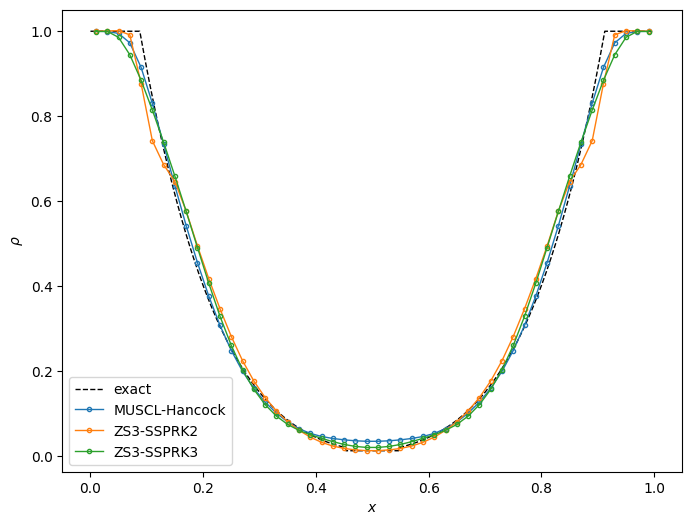

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$x$")

style0 = dict(color="k", linestyle="--", label="exact", linewidth=1)
style1 = dict(marker="o", markersize=3, mfc="none", linewidth=1)

ax.plot(xana, wana[0, :], **style0)
for name, sim in sims.items():
    plot_1d_slice(sim, ax, "rho", label=name, **style1)

ax.legend()

In [6]:
configs = {
    "MUSCL-Hancock": dict(
        riemann_solver="hllct",
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        flux_recipe=2,
        SED=True,
    ),
    "MM3-SSPRK2": dict(
        riemann_solver="hllct",
        p=3,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        flux_recipe=2,
        NAD=True,
        NAD_rtol=1e-1,
        NAD_atol=1e-8,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "MM3-SSPRK3": dict(
        riemann_solver="hllct",
        p=3,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        flux_recipe=2,
        NAD=True,
        NAD_rtol=1e-1,
        NAD_atol=1e-8,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

In [7]:
sims = {}
for name, config in configs.items():
    sim = EulerSolver(ic=toro2, nx=N, bcx="free", **config)
    try:
        q_max = 1 if "SSPRK2" in name else 2
        sim.run(T, q_max=q_max, muscl_hancock=config.get("MUSCL", False))
    except Exception as e:
        print(f"Error occurred while running {name}: {e}")
    sims[name] = sim

Step #26 @ t=1.50e-01 | dt=4.46e-03 | min(rho)=3.52e-02, min(P)=8.53e-03 | (done)                   
Step #26 @ t=1.50e-01 | dt=4.52e-03 | min(rho)=2.46e-02, min(P)=7.62e-03 | (done)                   
Step #26 @ t=1.50e-01 | dt=4.47e-03 | min(rho)=3.45e-02, min(P)=7.81e-03 | (done)                   


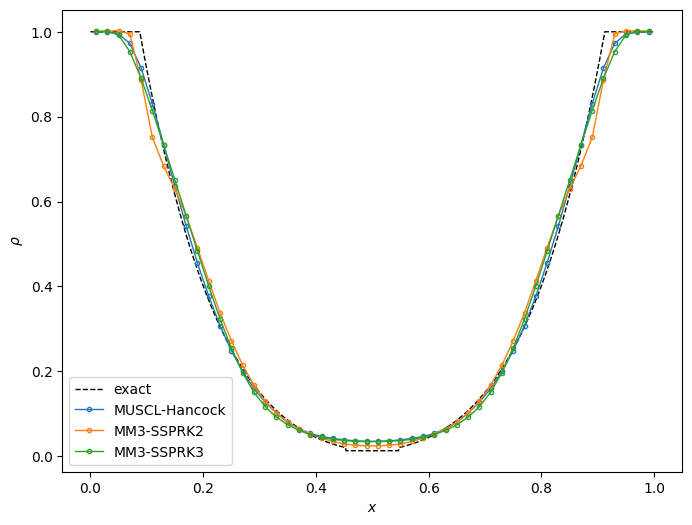

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$x$")

style0 = dict(color="k", linestyle="--", label="exact", linewidth=1)
style1 = dict(marker="o", markersize=3, mfc="none", linewidth=1)

ax.plot(xana, wana[0, :], **style0)
for name, sim in sims.items():
    plot_1d_slice(sim, ax, "rho", label=name, **style1)

ax.legend()